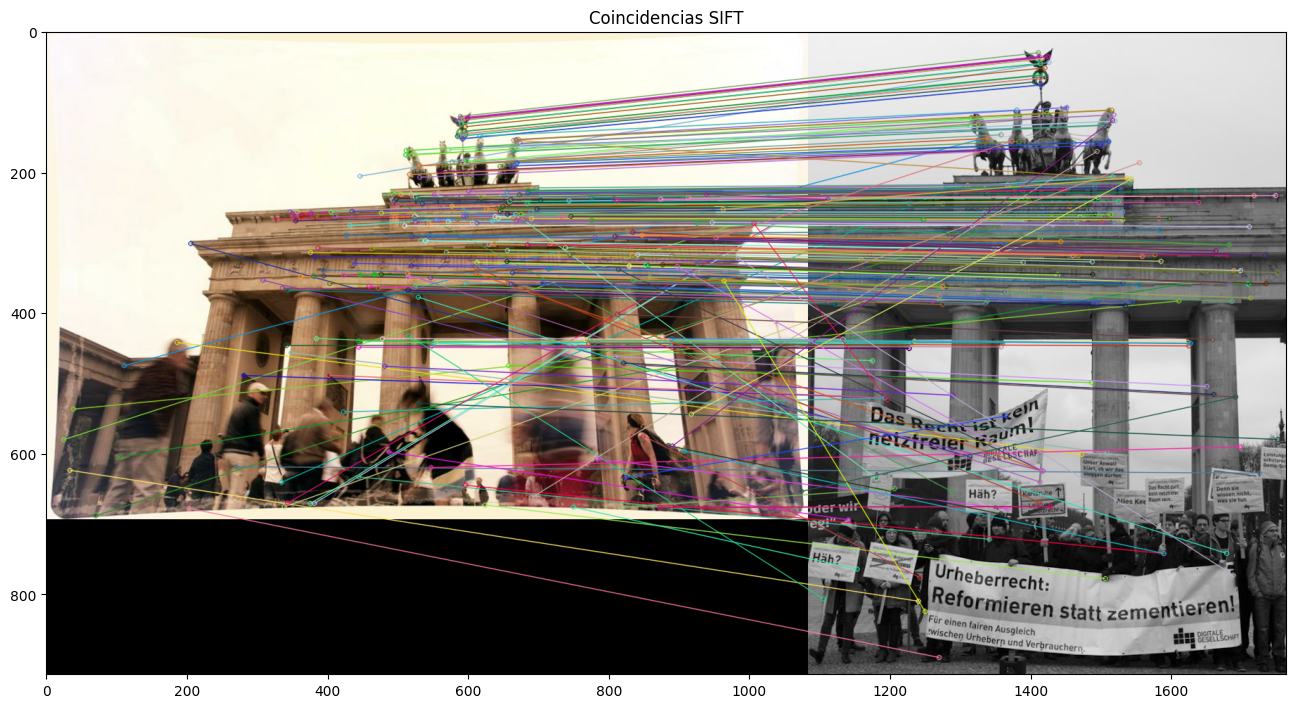

In [10]:
import cv2

# Cargar las imágenes
imagen1 = cv2.imread('prueba1.jpg')
imagen2 = cv2.imread('prueba2.jpg')

# Convertir las imágenes a escala de grises
gris1 = cv2.cvtColor(imagen1, cv2.COLOR_BGR2GRAY)
gris2 = cv2.cvtColor(imagen2, cv2.COLOR_BGR2GRAY)

# Crear el detector SIFT
sift = cv2.SIFT_create()

# Encontrar los puntos clave y descriptores con SIFT
puntos_clave1, descriptores1 = sift.detectAndCompute(gris1, None)
puntos_clave2, descriptores2 = sift.detectAndCompute(gris2, None)

# Crear un objeto de coincidencia de fuerza bruta
bf = cv2.BFMatcher()

# Realizar la coincidencia de descriptores
coincidencias = bf.knnMatch(descriptores1, descriptores2, k=2)

# Aplicar el filtro de Ratio Test
buenas_coincidencias = []
for m, n in coincidencias:
    if m.distance < 0.8 * n.distance:
        buenas_coincidencias.append(m)

# Dibujar las coincidencias en una nueva imagen
resultado = cv2.drawMatches(imagen1, puntos_clave1, imagen2, puntos_clave2, buenas_coincidencias, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


imagen1_rgb = cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB)



import matplotlib.pyplot as plt
cv2.imshow('Coincidencias SIFT', resultado)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(16, 16))
plt.imshow(imagen1_rgb)
plt.title('Coincidencias SIFT')
plt.show()
